In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [4]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [5]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [13]:
from sklearn.preprocessing import Binarizer
binarizer =  Binarizer(threshold = 0.1)
y_pred2 = binarizer.fit_transform(model_lor.predict_proba(X)[:,0].reshape(-1,1))

ravel() 함수를 써서 다차원 배열을 일차원으로 변환하는 방법도 있음

In [14]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)
print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도:0.1301, 정밀도: 0.1702, 재현율: 0.3443, F1: 0.2278


* ROC 곡선 시각화

In [20]:
from sklearn.metrics import roc_curve
pred_proba = model_lor.predict_proba(X)[:,1]
fprs, tprs, thresholds = roc_curve(y, pred_proba)

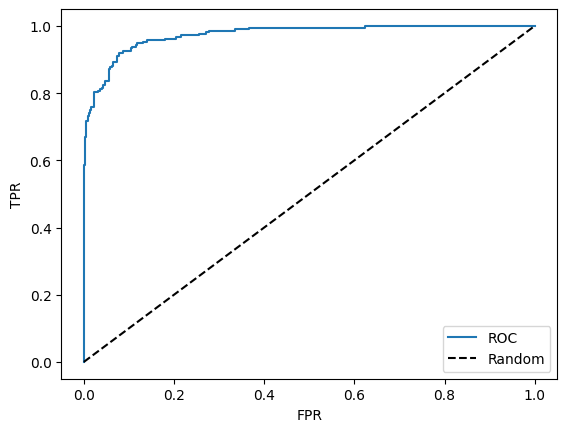

In [21]:
import matplotlib.pyplot as plt
plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], 'k--', label = 'Random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

* ROC AUC 값

In [22]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9741
